# 0.0 Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

0.1 Importando o dataset

In [2]:
from sklearn.datasets import fetch_california_housing

# Carregar o conjunto de dados
housing = fetch_california_housing()

In [3]:
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [4]:
# Converter o conjunto de dados em DataFrame pandas usando apenas os 8 atributos corretos
house_price_dataframe=pd.DataFrame(data=housing.data, columns=housing.feature_names)

In [5]:
# Adicionar a coluna de preço da casa ao DataFrame
house_price_dataframe['MedHouseValue'] = housing.target

In [6]:
# Verificar o DataFrame
print(house_price_dataframe.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  


# 1.0 DEscrição dos dados

In [44]:
df=house_price_dataframe.copy()
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseValue'],
      dtype='object')

In [ ]:
df2=house_price_dataframe.copy()

In [45]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1.2 Dimensão do DataFrame

In [46]:
print('Número de linhas: {}'.format(df.shape[0]))
print('Número de colunas: {}'.format(df.shape[1]))

Número de linhas: 20640
Número de colunas: 9


1.3 Verificando o tipo dos dados

In [47]:
df.dtypes

MedInc           float64
HouseAge         float64
AveRooms         float64
AveBedrms        float64
Population       float64
AveOccup         float64
Latitude         float64
Longitude        float64
MedHouseValue    float64
dtype: object

In [71]:
# Converter todas as colunas para o tipo "int"
df['MedInc'] = df['MedInc'].astype('int64')
df['HouseAge'] = df['HouseAge'].astype('int64')
df['AveRooms'] = df['AveRooms'].astype('int64')
df['AveBedrms'] = df['AveBedrms'].astype('int64')
df['Population'] = df['Population'].astype('int64')
df['AveOccup'] = df['AveOccup'].astype('int64')
df['Latitude'] = df['Latitude'].astype('int64')
df['Longitude'] = df['Longitude'].astype('int64')
df['MedHouseValue'] = df['MedHouseValue'].astype('int64')

# Verificar os tipos de dados após a conversão
print(df.dtypes)

MedInc           int64
HouseAge         int64
AveRooms         int64
AveBedrms        int64
Population       int64
AveOccup         int64
Latitude         int64
Longitude        int64
MedHouseValue    int64
dtype: object


In [49]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
202,1,43,3,1,1506,3,37.78,-122.23,1


1.4 VErificando NA

In [50]:
df.isna().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

1.5 Estatística Descritiva

In [51]:
# Calcular estatísticas descritivas manualmente para cada coluna
desc_stats_df = pd.DataFrame({
    'Count': df.count(),
    'Mean': df.mean(),
    'Std': df.std(),
    'Min': df.min(),
    '25%': df.quantile(0.25),
    'Median': df.median(),
    '75%': df.quantile(0.75),
    'Max': df.max(),
    'Variance': df.var(),
    'Skewness': df.skew(),
    'Kurtosis': df.kurtosis()
})

In [52]:
# Imprimir o DataFrame com a análise estatística descritiva
desc_stats_df

,Count,Mean,Std,Min,25%,Median,75%,Max,Variance,Skewness,Kurtosis
MedInc,20640,3.392975,1.932200,0.00,2.00,3.00,4.00,15.00,3.733397e+00,1.611073,5.024598
HouseAge,20640,28.639486,12.585558,1.00,18.00,29.00,37.00,52.00,1.583963e+02,0.060331,-0.800629
AveRooms,20640,4.933818,2.489414,0.00,4.00,5.00,6.00,141.00,6.197180e+00,20.214179,851.540809
AveBedrms,20640,0.815940,0.609920,0.00,1.00,1.00,1.00,34.00,3.720023e-01,14.081184,598.267277
Population,20640,1425.476744,1132.462122,3.00,787.00,1166.00,1725.00,35682.00,1.282470e+06,4.935858,73.553116
AveOccup,20640,2.565213,10.391457,0.00,2.00,2.00,3.00,1243.00,1.079824e+02,97.515739,10633.734058
Latitude,20640,35.631861,2.135952,32.54,33.93,34.26,37.71,41.95,4.562293e+00,0.465953,-1.117760
Longitude,20640,-119.569704,2.003532,-124.35,-121.80,-118.49,-118.01,-114.31,4.014139e+00,-0.297801,-1.330152
MedHouseValue,20640,1.571124,1.264781,0.00,1.00,1.00,2.00,5.00,1.599670e+00,1.009761,0.710427


<Figure size 1200x800 with 0 Axes>

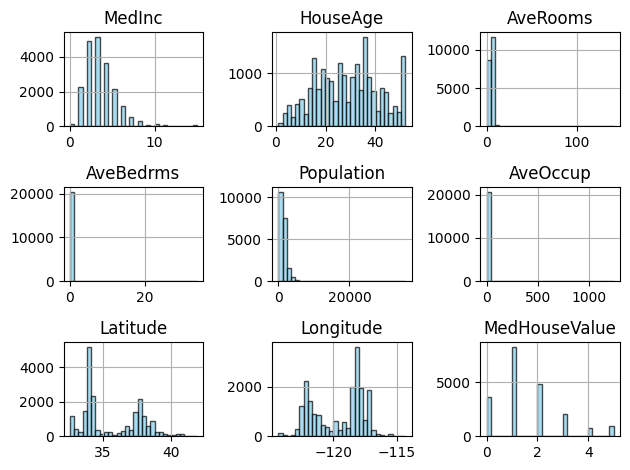

In [53]:
# Plotar histogramas das variáveis numéricas
plt.figure(figsize=(12, 8))
df.hist(bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.tight_layout()
#plt.suptitle('Histogramas das Variáveis Numéricas', fontsize=16)
plt.show()

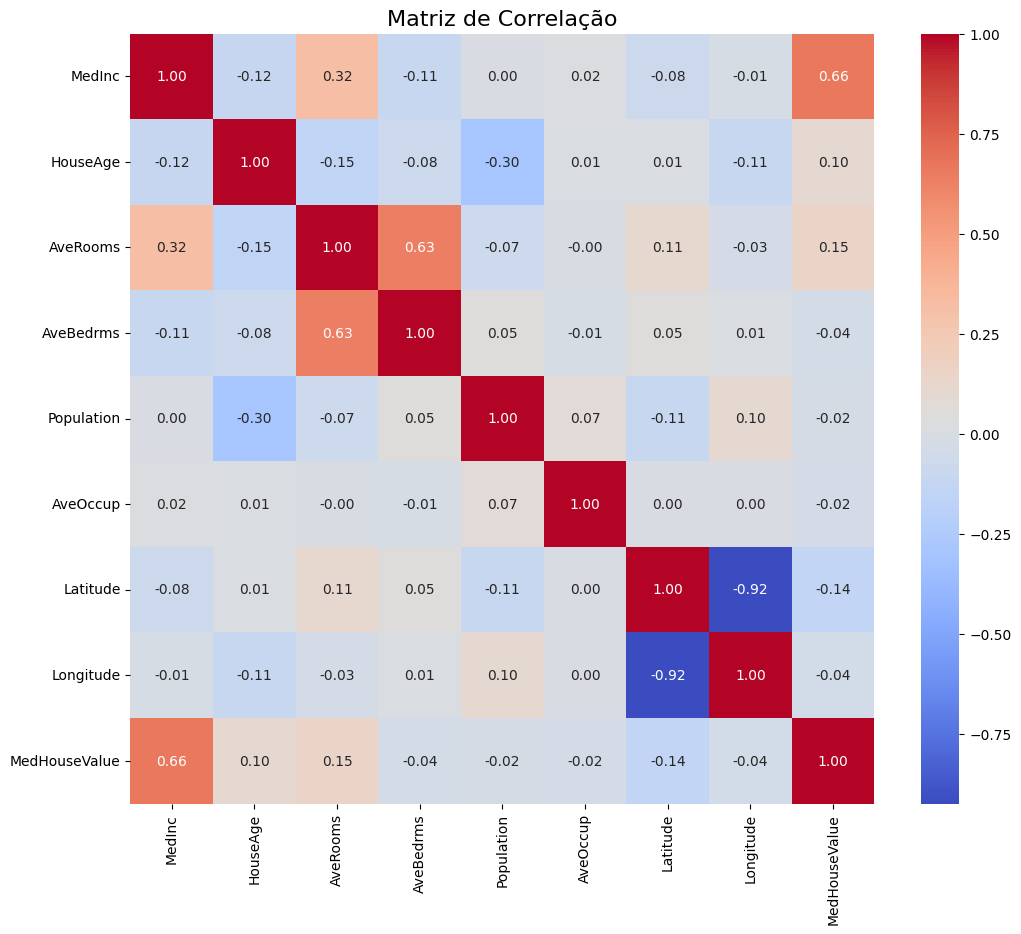

In [55]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação', fontsize=16)
plt.show()

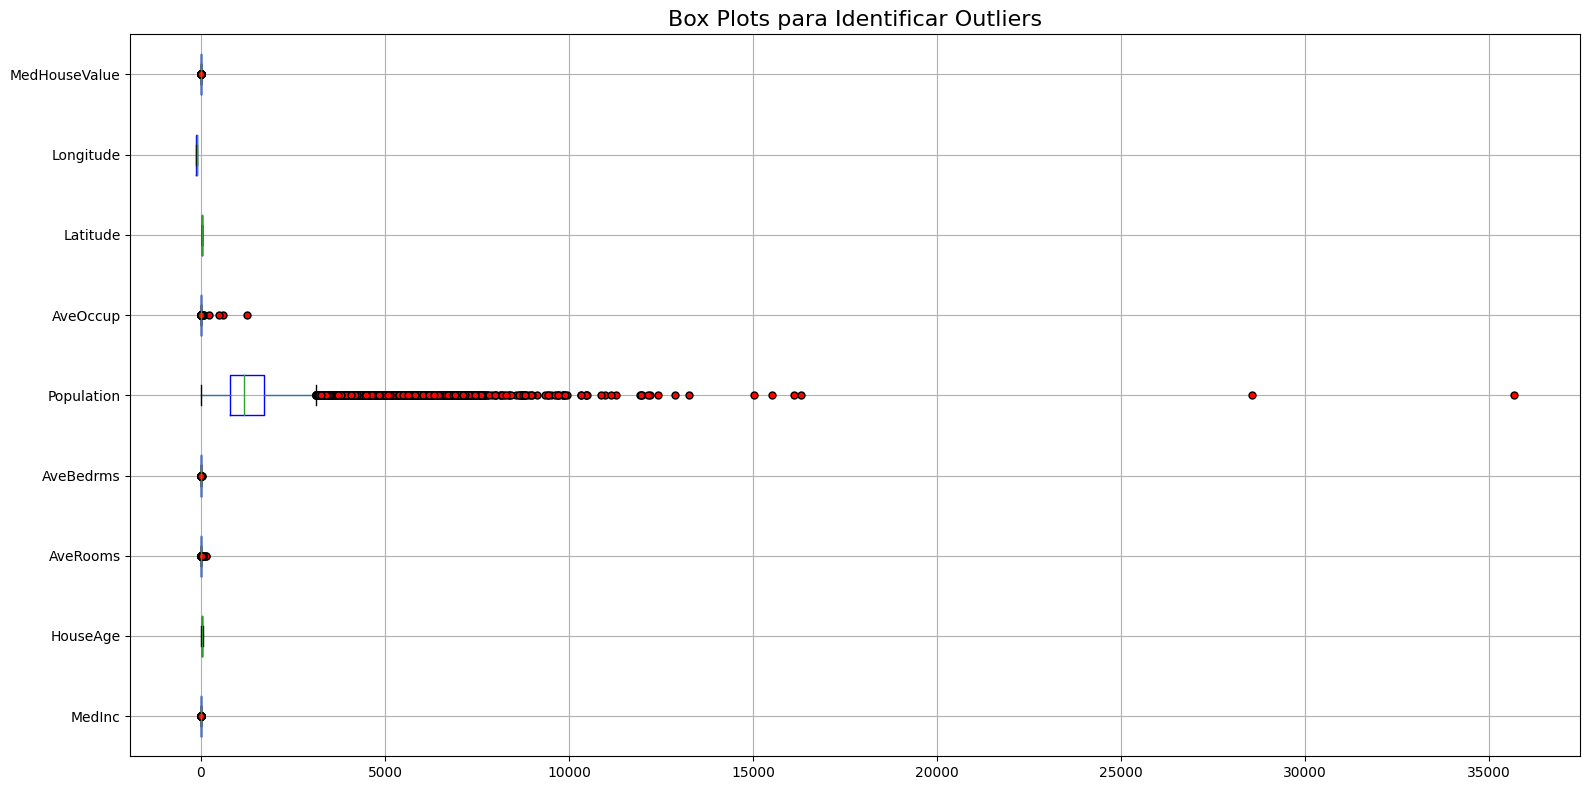

In [56]:
# Box plots para identificar outliers
num_cols = [col for col in df.columns if col not in ["longitude", "latitude"]]
plt.figure(figsize=(16, 8))
df[num_cols].boxplot(vert=False, showfliers=True, boxprops=dict(color='blue'), flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))
plt.title('Box Plots para Identificar Outliers', fontsize=16)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


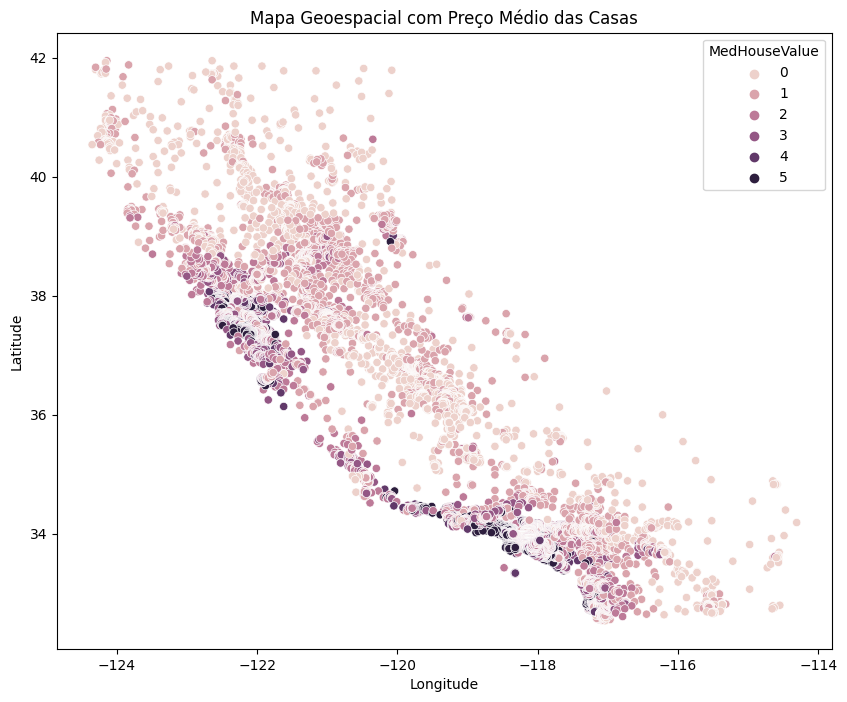

In [57]:
# Mapa geoespacial (usando Latitude e Longitude)
if all(col in df.columns for col in ['Latitude', 'Longitude']):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Longitude', y='Latitude', hue='MedHouseValue', data=df, cmap='coolwarm')
    plt.title('Mapa Geoespacial com Preço Médio das Casas')
    plt.show()

#2.0 Feature Engineering

2.1 Feature Engineering(derivar as variáveis)

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [25]:
# 1. Normalização das colunas numéricas
#scaler = StandardScaler()
#num_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseValue']
#df1[num_cols] = scaler.fit_transform(df1[num_cols])

# 3. Tratamento de variáveis categóricas (exemplo: StoreType)
#if 'StoreType' in df1.columns:
 #   df1 = pd.get_dummies(df1, columns=['StoreType'], drop_first=True)

# Verificar o DataFrame após o feature engineering
#print(df1.head())

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.384399  0.982143  0.428297   0.301785   -0.974429 -0.054393        37   
1  2.384399 -0.607019  0.428297  -1.337814    0.861439 -0.054393        37   
2  1.866842  1.856182  1.231718   0.301785   -0.820777 -0.054393        37   
3  0.831728  1.856182  0.026586   0.301785   -0.766028 -0.054393        37   
4 -0.203387  1.856182  0.428297   0.301785   -0.759847 -0.054393        37   

   Longitude  MedHouseValue  RoomsPerHouse  
0       -122        1.92044       0.436084  
1       -122        1.12977      -0.705574  
2       -122        1.12977       0.663576  
3       -122        1.12977       0.014323  
4       -122        1.12977       0.230741  


2.2 Hipóteses

1. **Hipótese 1: Renda Média e Preço Médio das Casas**: É provável que exista uma correlação positiva entre a renda média da população em uma determinada região e o preço médio das casas nessa região. Ou seja, áreas com maior renda média tendem a ter casas com preços mais altos.

2. **Hipótese 2: População e Ocupação Média**: Pode haver uma relação entre a população total em uma área e a ocupação média das casas nessa área. Regiões com alta densidade populacional podem ter uma maior ocupação média nas casas.

3. **Hipótese 3: Localização Geoespacial e Preço das Casas**: A localização geoespacial (latitude e longitude) pode influenciar o preço médio das casas. Algumas áreas geográficas específicas podem ter um impacto significativo nos preços.

4. **Hipótese 4: Idade Média das Casas e Preço**: A idade média das casas em uma região pode estar relacionada ao preço médio das casas. Áreas com casas mais antigas podem ter preços diferentes das áreas com casas mais recentes.


Essas são apenas algumas hipóteses iniciais. Hipóteses são suposições que fazemos com base nos dados disponíveis. Tais hipóteses serão importante para  o processo de desenvolvimento de um projeto de machine learning que envolve testar essas hipóteses, validar os resultados e iterar para refiná-las e melhorar a qualidade do modelo.

# 3.0 Machine Learning

In [26]:
from sklearn.model_selection import train_test_split

In [72]:
X= df.drop(['MedHouseValue'], axis=1)
y=df['MedHouseValue']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [74]:
train_data=X_train.join(y_train)

In [75]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
12018,4,28,6,0,1061,3,33,-117,1
4731,2,49,5,0,462,2,34,-118,2
5465,2,46,3,1,1107,1,33,-118,3
14382,2,40,4,1,953,1,32,-117,2
9320,2,52,3,1,700,1,37,-122,2
...,...,...,...,...,...,...,...,...,...
153,4,52,6,1,612,2,37,-122,3
866,5,12,5,1,3436,3,37,-122,2
74,2,20,6,1,290,2,37,-122,1
14512,6,5,5,0,1063,3,32,-117,2


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseValue'}>]], dtype=object)

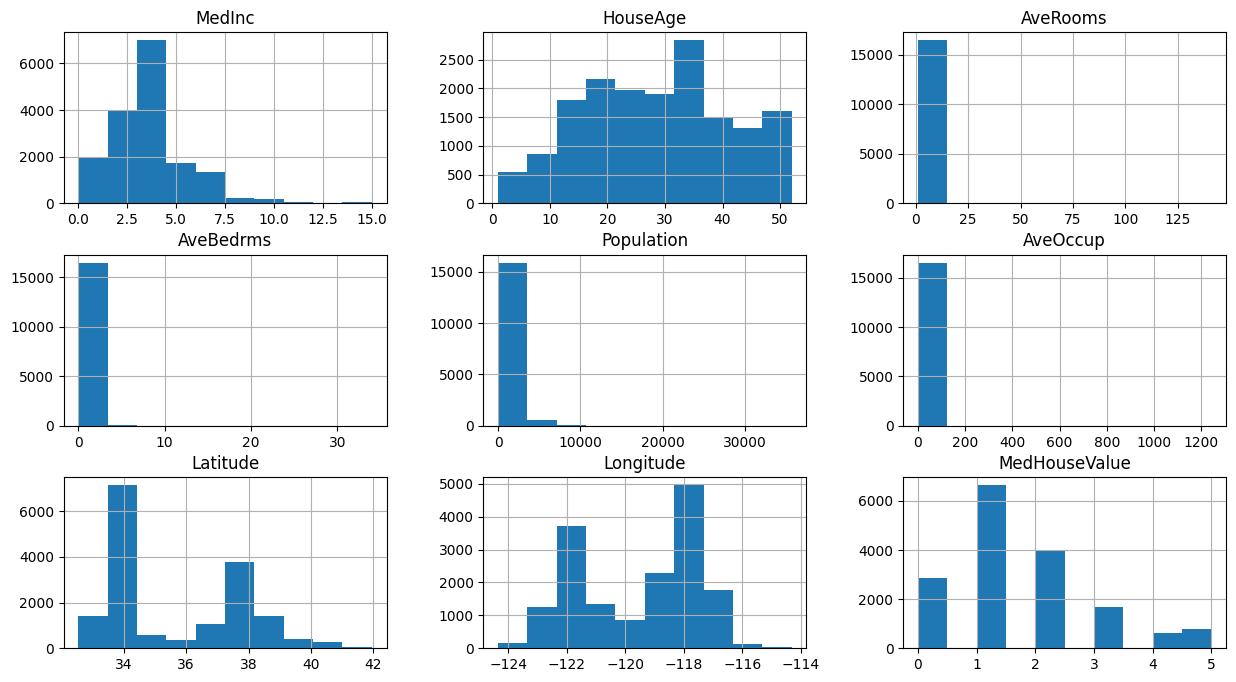

In [62]:
train_data.hist(figsize=(15,8))

In [63]:
train_data['Population']=np.log(train_data['Population']+1)
train_data['AveRooms']=np.log(train_data['AveRooms']+1)
train_data['AveBedrms']=np.log(train_data['AveBedrms']+1)
train_data['AveOccup']=np.log(train_data['AveOccup']+1)

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseValue'}>]], dtype=object)

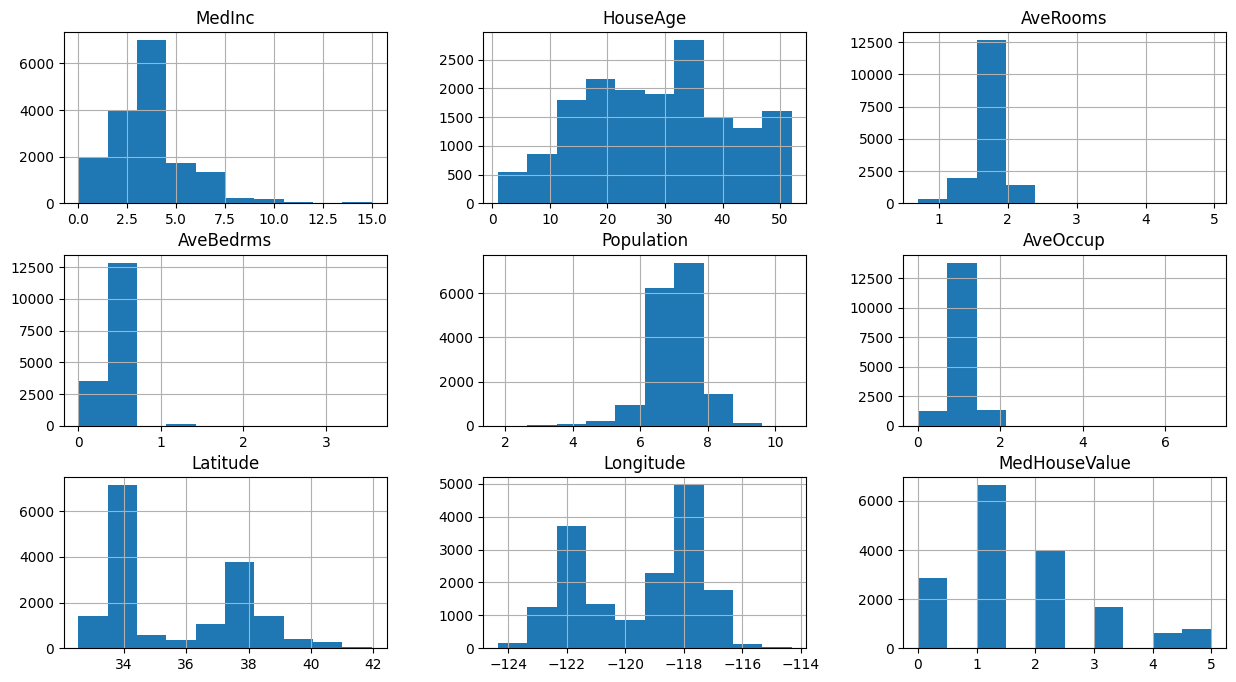

In [64]:
train_data.hist(figsize=(15,8))

In [76]:
#train_data['bedroom_ratio']=train_data['AveBedrms']/train_data['AveRooms']

In [77]:
#train_data['household_rooms']=train_data['AveRooms']/train_data['AveOccup']

In [80]:
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue,bedroom_ratio,household_rooms
12018,4,28,6,0,1061,3,33,-117,1,0.000000,2.0
4731,2,49,5,0,462,2,34,-118,2,0.000000,2.5
5465,2,46,3,1,1107,1,33,-118,3,0.333333,3.0
14382,2,40,4,1,953,1,32,-117,2,0.250000,4.0
9320,2,52,3,1,700,1,37,-122,2,0.333333,3.0


In [68]:
from sklearn.linear_model import LinearRegression

In [87]:
train_data.dtypes

MedInc               int64
HouseAge             int64
AveRooms             int64
AveBedrms            int64
Population           int64
AveOccup             int64
Latitude             int64
Longitude            int64
MedHouseValue        int64
bedroom_ratio      float64
household_rooms    float64
dtype: object

In [92]:

# Excluir as colunas 'bedroom_ratio' e 'household_rooms' do DataFrame 'train_data'
train_data.drop(['bedroom_ratio', 'household_rooms'], axis=1, inplace=True)

### 3.1 Ajuste do modelo com os dados de treinamento

In [118]:
from sklearn.preprocessing import StandardScaler

In [121]:
scaler = StandardScaler()

In [131]:
#Ajuste do modelo
X_train,y_train=train_data.drop(['MedHouseValue'], axis=1), train_data['MedHouseValue']

X_train_s= scaler.fit_transform(X_train)

reg=LinearRegression()
reg.fit(X_train_s, y_train)

LinearRegression()

### 3.2 Preparação dos dados de teste

In [142]:
# Combinar os dados de teste e o valor alvo (y_test) em um DataFrame
test_data=X_test.join(y_test)

# Aplicar transformação logarítmica em algumas colunas dos dados de teste
test_data['Population']=np.log(test_data['Population']+1)
test_data['AveRooms']=np.log(test_data['AveRooms']+1)
test_data['AveBedrms']=np.log(test_data['AveBedrms']+1)
test_data['AveOccup']=np.log(test_data['AveOccup']+1)



In [143]:
# Separar os dados de teste novamente após as transformações
X_test,y_test=test_data.drop(['MedHouseValue'], axis=1), test_data['MedHouseValue']

In [144]:
# Aplicar o scaler ajustado aos novos dados de teste
X_test_s = scaler.transform(X_test)

In [ ]:
# O scaler é usado para realizar a padronização dos dados de treinamento antes de ajustar o modelo de regressão linear. A padronização transforma cada coluna dos dados para que ela tenha média zero e desvio padrão igual a um. Isso é feito para garantir que todas as características tenham a mesma escala, o que é especialmente importante para algoritmos
#que utilizam medidas de distância, como o modelo de regressão linear.

In [145]:
# Avaliação do modelo de regressão linear (acurácia)
linear_regression_score = reg.score(X_test_s, y_test)
print(f"R² do modelo de regressão linear nos dados de teste: {linear_regression_score:.4f}")

R² do modelo de regressão linear nos dados de teste: 0.5213


In [136]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
# Criar uma instância do modelo de regressão de floresta aleatória
forest = RandomForestRegressor()

# Treinar o modelo de floresta aleatória nos dados de treinamento originais
forest.fit(X_train, y_train)

RandomForestRegressor()

In [166]:
# Obter o coeficiente de determinação (R²) para medir o desempenho do modelo nos dados de teste originais
forest_score = forest.score(X_test, y_test)
print(f"R² do modelo de floresta aleatória nos dados de teste originais: {forest_score:.4f}")

R² do modelo de floresta aleatória nos dados de teste originais: -0.0256


### 3.2 Ajuste de hiperparâmetros usando GridSearchCV

In [139]:
from sklearn.model_selection import GridSearchCV

In [148]:
forest= RandomForestRegressor()

In [154]:
# Definir os hiperparâmetros que serão testados usando o GridSearchCV
param_grid = {
    "n_estimators":[100,200,300],
    "max_depth":[None,4,8],
    "min_samples_split":[2,4]
}

# Criar uma instância do GridSearchCV para encontrar os melhores hiperparâmetros
grid_search=GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# Realizar o ajuste com o GridSearchCV nos dados de treinamento padronizados
grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [155]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [156]:
grid_search.best_estimator_.score(X_test_s, y_test)

-0.12054451210632844

In [157]:
best_forest=grid_search.best_estimator_

In [158]:
best_forest.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


-1.521269708257361

### 4.0 Visualização dos resultados

In [159]:
import matplotlib.pyplot as plt
import numpy as np

In [167]:
# Obter as previsões do modelo de regressão linear e do modelo de floresta aleatória
linear_regression_predictions = reg.predict(X_test_s)
forest_predictions = forest.predict(X_test)

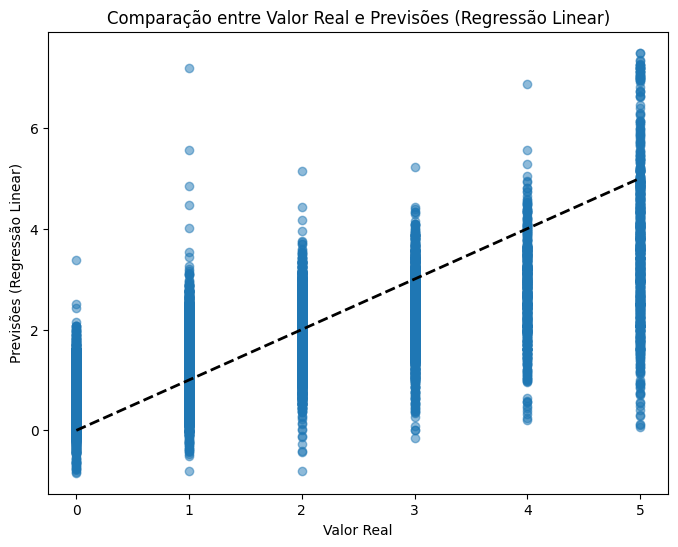

In [161]:

# Scatter plot para comparar os valores reais com as previsões do modelo de regressão linear
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_regression_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsões (Regressão Linear)')
plt.title('Comparação entre Valor Real e Previsões (Regressão Linear)')
plt.show()

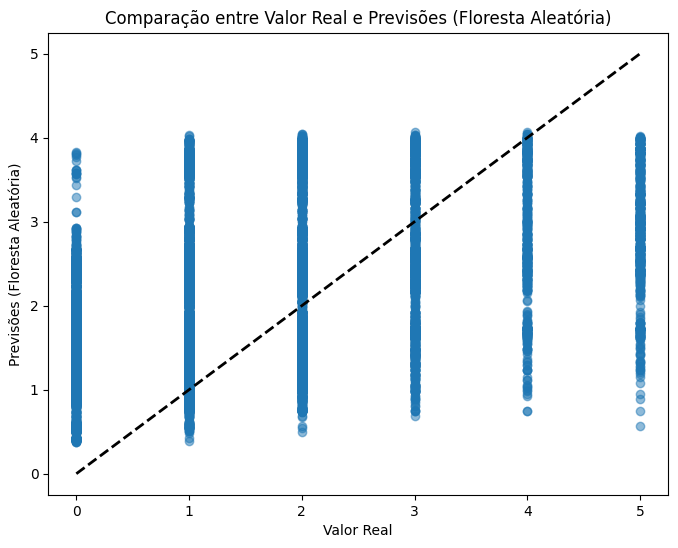

In [168]:
# Scatter plot para comparar os valores reais com as previsões do modelo de floresta aleatória
plt.figure(figsize=(8, 6))
plt.scatter(y_test, forest_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valor Real')
plt.ylabel('Previsões (Floresta Aleatória)')
plt.title('Comparação entre Valor Real e Previsões (Floresta Aleatória)')
plt.show()

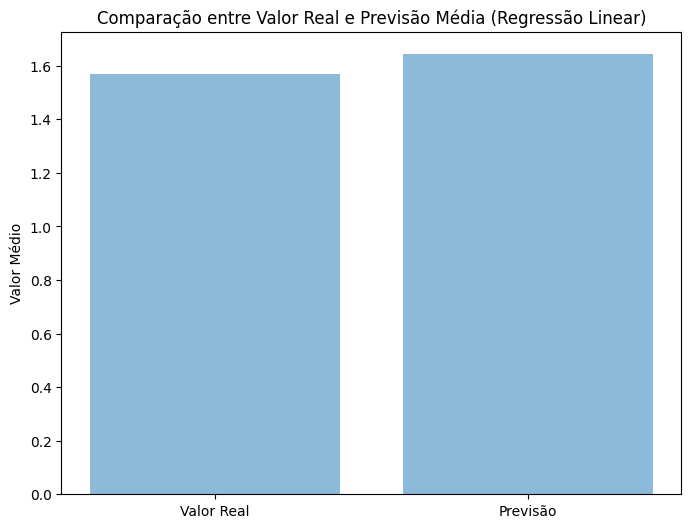

In [163]:
# Gráfico de barras para comparar os valores reais e as previsões médias do modelo de regressão linear
plt.figure(figsize=(8, 6))
plt.bar(['Valor Real', 'Previsão'], [y_test.mean(), linear_regression_predictions.mean()], alpha=0.5)
plt.ylabel('Valor Médio')
plt.title('Comparação entre Valor Real e Previsão Média (Regressão Linear)')
plt.show()

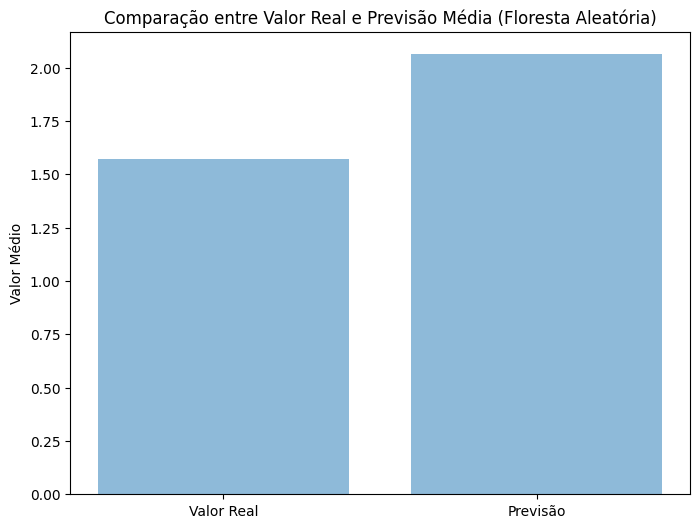

In [169]:
# Gráfico de barras para comparar os valores reais e as previsões médias do modelo de floresta aleatória
plt.figure(figsize=(8, 6))
plt.bar(['Valor Real', 'Previsão'], [y_test.mean(), forest_predictions.mean()], alpha=0.5)
plt.ylabel('Valor Médio')
plt.title('Comparação entre Valor Real e Previsão Média (Floresta Aleatória)')
plt.show()